<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Solar_Energy_Generation_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-d64984ceb2fc>:17: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])


Plant 1 - MSE: 319848.78 | R2: 0.980
Plant 2 - MSE: 52220.83 | R2: 0.617


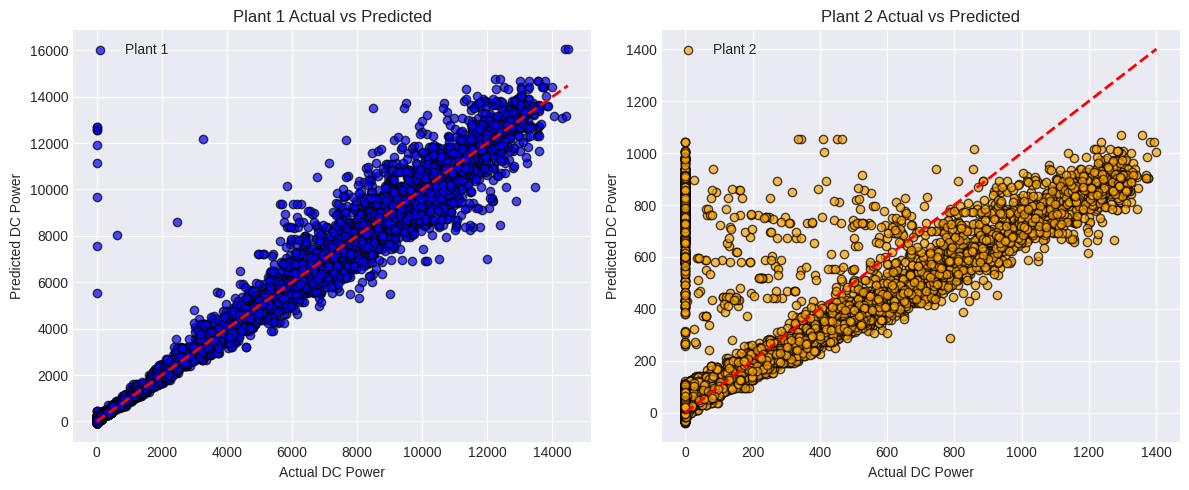

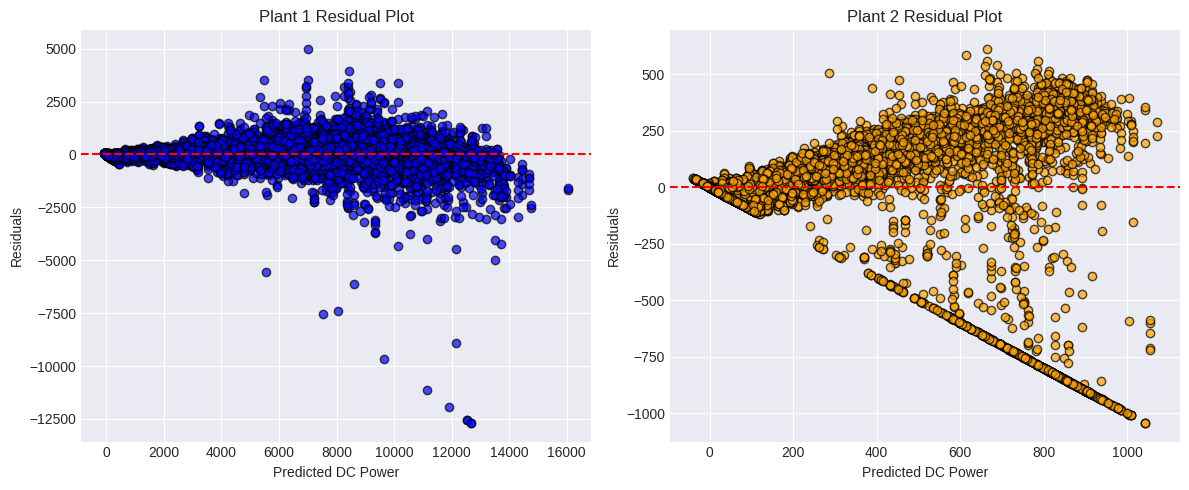

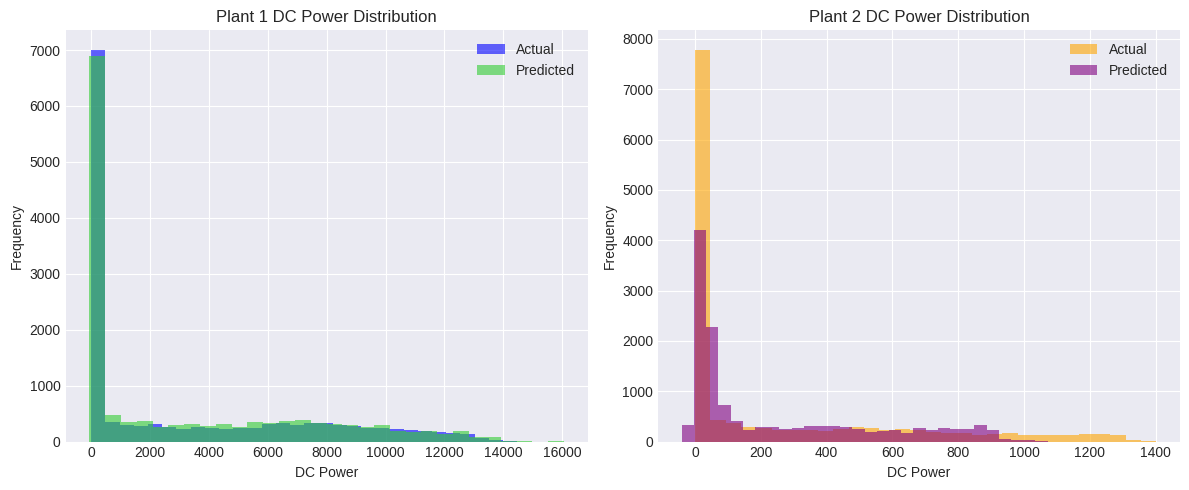

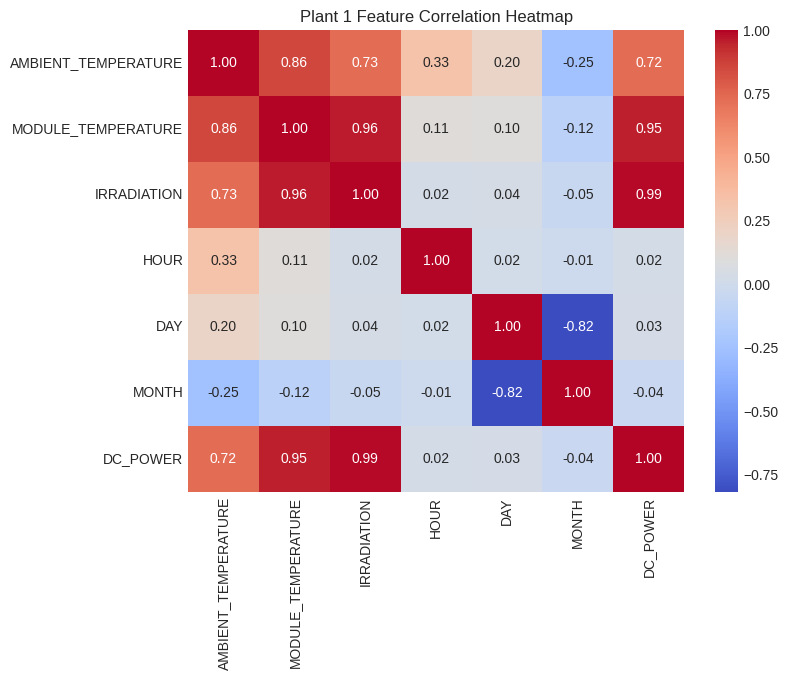

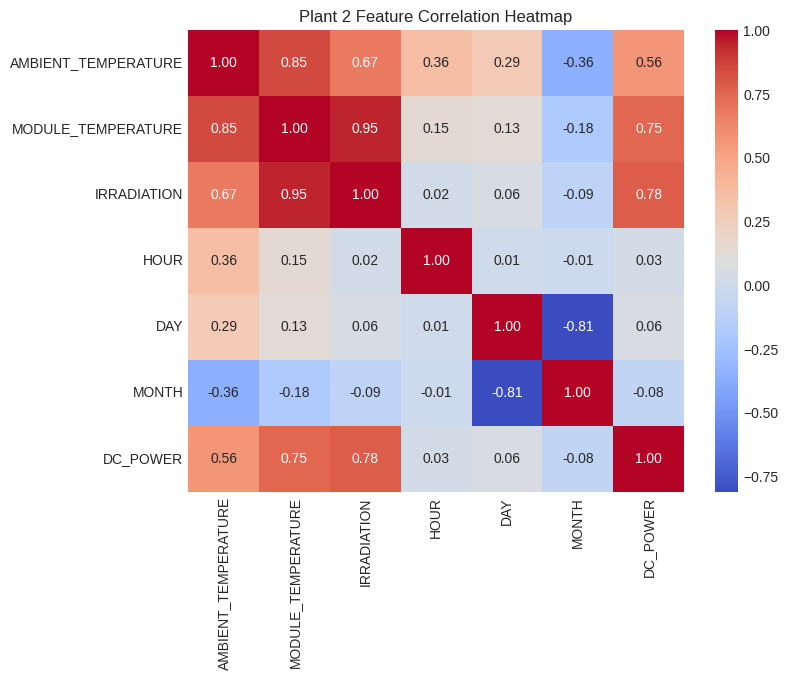

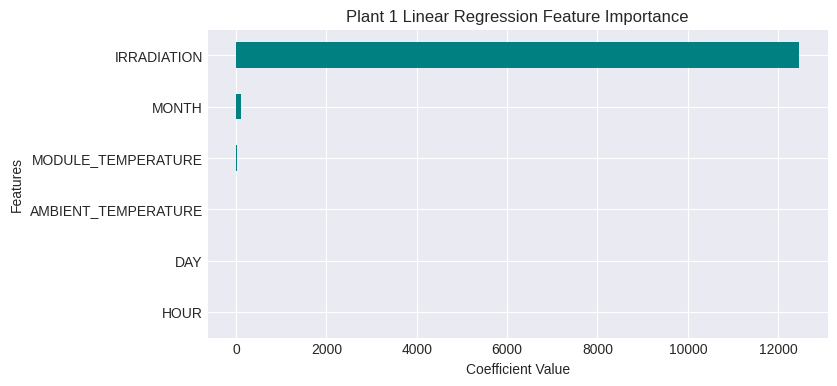

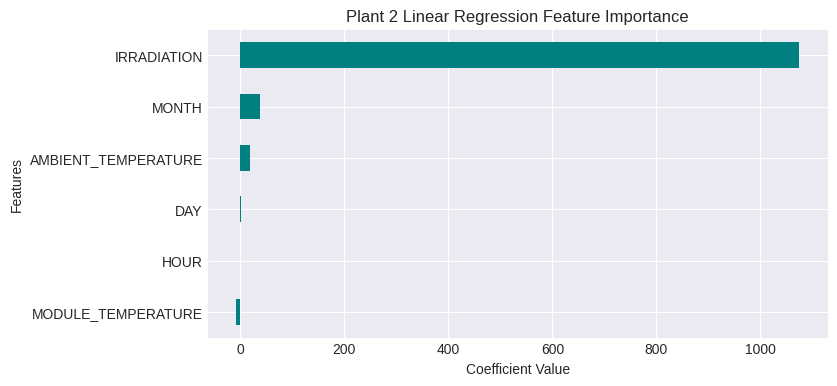

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
plant_1_gen = pd.read_csv('/content/Plant_1_Generation_Data.csv')
plant_1_weather = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')
plant_2_gen = pd.read_csv('/content/Plant_2_Generation_Data.csv')
plant_2_weather = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

# Convert date time columns to pandas datetime objects
plant_1_gen['DATE_TIME'] = pd.to_datetime(plant_1_gen['DATE_TIME'])
plant_1_weather['DATE_TIME'] = pd.to_datetime(plant_1_weather['DATE_TIME'])
plant_2_gen['DATE_TIME'] = pd.to_datetime(plant_2_gen['DATE_TIME'])
plant_2_weather['DATE_TIME'] = pd.to_datetime(plant_2_weather['DATE_TIME'])

# Merge generation and weather data on DATE_TIME
plant_1_data = pd.merge(plant_1_gen, plant_1_weather, on='DATE_TIME')
plant_2_data = pd.merge(plant_2_gen, plant_2_weather, on='DATE_TIME')

# Feature engineering: extract hour, day, month for potential higher modeling
for df in [plant_1_data, plant_2_data]:
    df['HOUR'] = df['DATE_TIME'].dt.hour
    df['DAY'] = df['DATE_TIME'].dt.day
    df['MONTH'] = df['DATE_TIME'].dt.month

# Select features (independent variables) and target variable DC_POWER
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR', 'DAY', 'MONTH']
target = 'DC_POWER'

X1 = plant_1_data[features]
y1 = plant_1_data[target]
X2 = plant_2_data[features]
y2 = plant_2_data[target]

# Split into train/test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train Linear Regression models
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

# Evaluate models
def eval_metrics(y_true, y_pred, plant_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{plant_name} - MSE: {mse:.2f} | R2: {r2:.3f}")

eval_metrics(y1_test, y1_pred, "Plant 1")
eval_metrics(y2_test, y2_pred, "Plant 2")

# Visualization Setup
plt.style.use('seaborn-v0_8-darkgrid')

# Scatter plot actual vs predicted
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y1_test, y1_pred, c='blue', edgecolors='k', alpha=0.7, label='Plant 1')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--', lw=2)
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.title('Plant 1 Actual vs Predicted')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(y2_test, y2_pred, c='orange', edgecolors='k', alpha=0.7, label='Plant 2')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.title('Plant 2 Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
residuals1 = y1_test - y1_pred
plt.scatter(y1_pred, residuals1, c='blue', alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted DC Power')
plt.ylabel('Residuals')
plt.title('Plant 1 Residual Plot')
plt.subplot(1,2,2)
residuals2 = y2_test - y2_pred
plt.scatter(y2_pred, residuals2, c='orange', alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted DC Power')
plt.ylabel('Residuals')
plt.title('Plant 2 Residual Plot')
plt.tight_layout()
plt.show()

# Histogram of Actual and Predicted DC Power
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(y1_test, bins=30, alpha=0.6, label='Actual', color='blue')
plt.hist(y1_pred, bins=30, alpha=0.6, label='Predicted', color='limegreen')
plt.title('Plant 1 DC Power Distribution')
plt.xlabel('DC Power')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1,2,2)
plt.hist(y2_test, bins=30, alpha=0.6, label='Actual', color='orange')
plt.hist(y2_pred, bins=30, alpha=0.6, label='Predicted', color='purple')
plt.title('Plant 2 DC Power Distribution')
plt.xlabel('DC Power')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Correlation heatmap for features & target Plant 1
plt.figure(figsize=(8,6))
sns.heatmap(plant_1_data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plant 1 Feature Correlation Heatmap')
plt.show()

# Correlation heatmap for features & target Plant 2
plt.figure(figsize=(8,6))
sns.heatmap(plant_2_data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plant 2 Feature Correlation Heatmap')
plt.show()

# Feature importance from Linear Regression
def plot_feature_importance(model, features, plant):
    coefs = model.coef_
    feat_imp = pd.Series(coefs, index=features).sort_values()
    plt.figure(figsize=(8,4))
    feat_imp.plot(kind='barh', color='teal')
    plt.title(f'{plant} Linear Regression Feature Importance')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()
plot_feature_importance(model1, features, 'Plant 1')
plot_feature_importance(model2, features, 'Plant 2')